In [1]:
import sys
print("versão do python que utilizaremos:",sys.version)

versão do python que utilizaremos: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
caminho_dados = r"C:\Users\Usuário\Downloads\archive (2)"

In [5]:
customers = pd.read_csv(f"{caminho_dados}/olist_customers_dataset.csv")
orders = pd.read_csv(f"{caminho_dados}/olist_orders_dataset.csv")
order_items = pd.read_csv(f"{caminho_dados}/olist_order_items_dataset.csv")
products = pd.read_csv(f"{caminho_dados}/olist_products_dataset.csv")
sellers = pd.read_csv(f"{caminho_dados}/olist_sellers_dataset.csv")
order_payments = pd.read_csv(f"{caminho_dados}/olist_order_payments_dataset.csv")
order_reviews = pd.read_csv(f"{caminho_dados}/olist_order_reviews_dataset.csv")
geolocation = pd.read_csv(f"{caminho_dados}/olist_geolocation_dataset.csv")
category_translation = pd.read_csv(f"{caminho_dados}/product_category_name_translation.csv")

print("Customers:")
display(customers.head())

print("Orders:")
display(orders.head())

print("Order Items:")
display(order_items.head())

Customers:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Order Items:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders.dropna(subset=['order_purchase_timestamp'], inplace=True)

orders.set_index('order_purchase_timestamp', inplace=True)

print(orders.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99441 entries, 2017-10-02 10:56:33 to 2018-03-08 20:57:30
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_approved_at              99281 non-null  object
 4   order_delivered_carrier_date   97658 non-null  object
 5   order_delivered_customer_date  96476 non-null  object
 6   order_estimated_delivery_date  99441 non-null  object
dtypes: object(7)
memory usage: 6.1+ MB
None


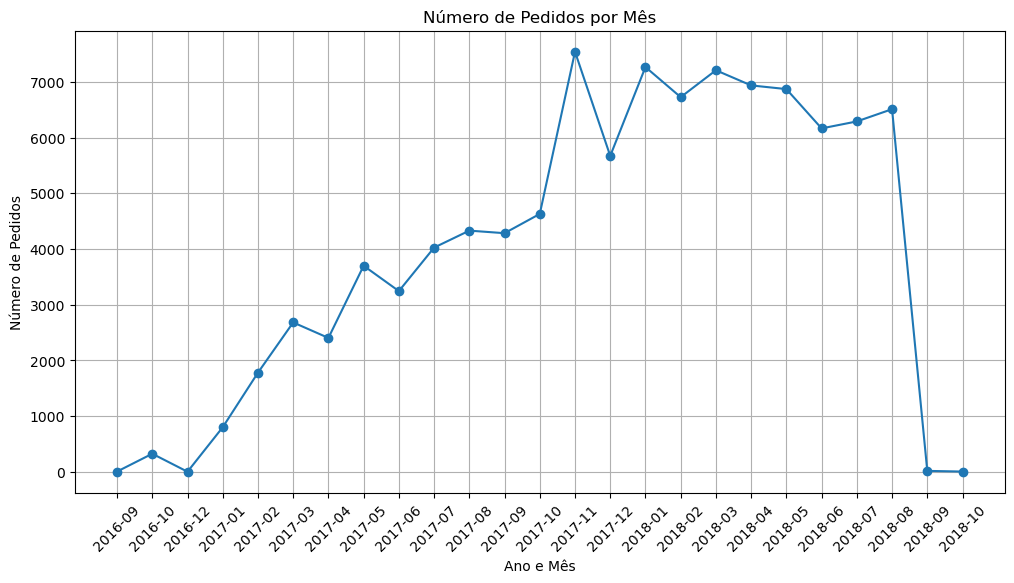

In [7]:
orders['year_month'] = orders.index.to_period('M')
orders_monthly = orders.groupby('year_month').size()

plt.figure(figsize=(12,6))
plt.plot(orders_monthly.index.astype(str), orders_monthly, marker='o', linestyle='-')
plt.xlabel("Ano e Mês")
plt.ylabel("Número de Pedidos")
plt.title("Número de Pedidos por Mês")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


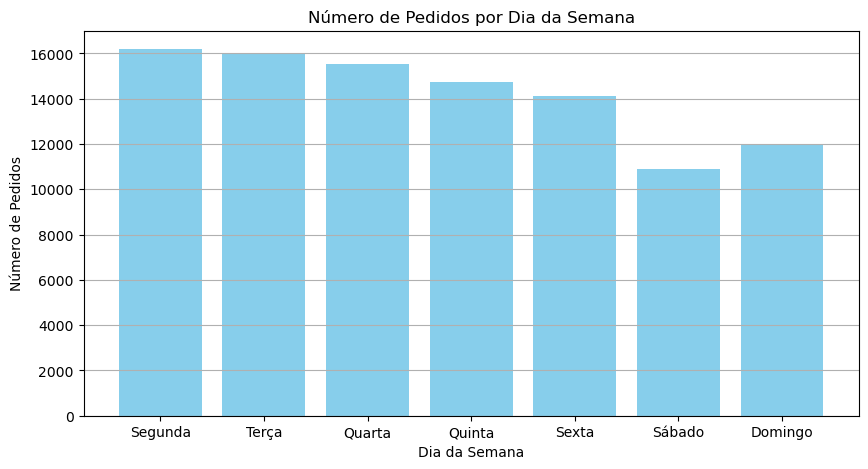

In [8]:
orders['day_of_week'] = orders.index.dayofweek  # 0=segunda, 6=domingo

orders_weekly = orders.groupby('day_of_week').size()

dias_semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

plt.figure(figsize=(10,5))
plt.bar(dias_semana, orders_weekly, color='skyblue')
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Pedidos")
plt.title("Número de Pedidos por Dia da Semana")
plt.grid(axis='y')
plt.show()

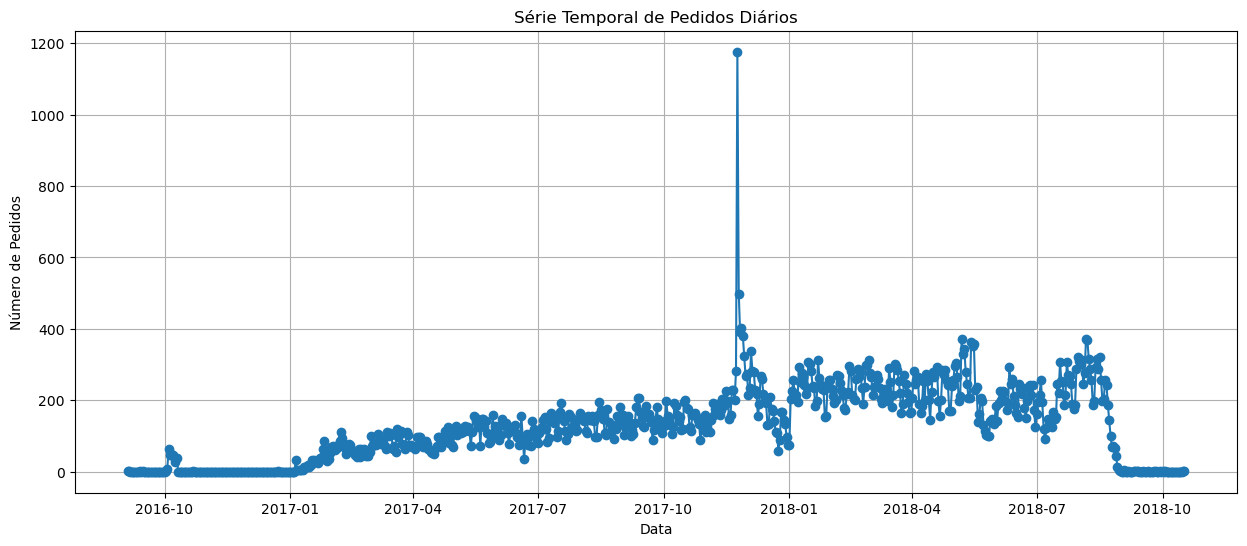

In [9]:
df_series = orders.resample('D').size().to_frame(name='num_pedidos')

plt.figure(figsize=(15,6))
plt.plot(df_series, marker='o', linestyle='-')
plt.xlabel("Data")
plt.ylabel("Número de Pedidos")
plt.title("Série Temporal de Pedidos Diários")
plt.grid(True)
plt.show()


In [17]:
train_size = int(len(df_series) * 0.8)
train, test = df_series[:train_size], df_series[train_size:]

model_arima = ARIMA(train, order=(5,1,0))
model_fit = model_arima.fit()

forecast_arima = model_fit.forecast(steps=len(test))

mae_arima = mean_absolute_error(test, forecast_arima)
rmse_arima = mean_squared_error(test, forecast_arima, squared=False)

print(f"ARIMA - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")


ARIMA - MAE: 163.06, RMSE: 194.26


In [18]:
# Normalizar os dados
scaler = MinMaxScaler()
df_series_scaled = scaler.fit_transform(df_series)

# Criar função para gerar sequências para LSTM
def criar_dados_lstm(dataset, lookback=10):
    X, y = [], []
    for i in range(len(dataset) - lookback):
        X.append(dataset[i:(i+lookback)])
        y.append(dataset[i+lookback])
    return np.array(X), np.array(y)

# Criar sequências
lookback = 10
X, y = criar_dados_lstm(df_series_scaled, lookback)

# Separar treino e teste
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Criar modelo LSTM
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(lookback, 1), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

# Treinar modelo
model_lstm.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Fazer previsões
y_pred = model_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

print("LSTM rodou corretamente!")


Epoch 1/20
39/39 [==============================] - 5s 23ms/step - loss: 0.0070 - val_loss: 0.0034
Epoch 2/20
39/39 [==============================] - 1s 16ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 3/20
39/39 [==============================] - 1s 15ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 4/20
39/39 [==============================] - 1s 16ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 5/20
39/39 [==============================] - 1s 15ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 6/20
39/39 [==============================] - 1s 14ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 7/20
39/39 [==============================] - 0s 12ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 8/20
39/39 [==============================] - 0s 12ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 9/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 10/20
39/39 [==============================] - 1s 14ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 11/

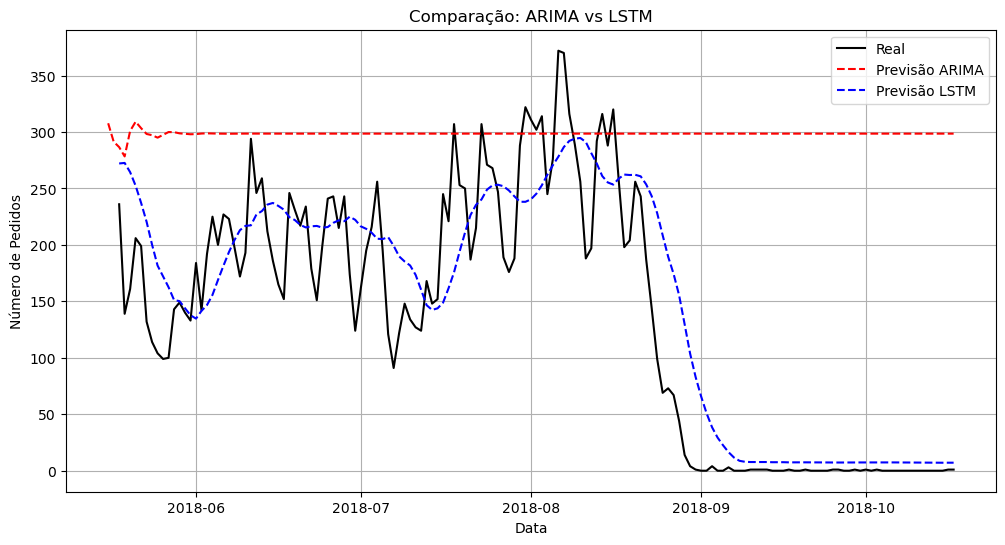

In [19]:
plt.figure(figsize=(12,6))

plt.plot(df_series.index[train_size + lookback:], df_series.iloc[train_size + lookback:], label="Real", color='black')

plt.plot(test.index, forecast_arima, label="Previsão ARIMA", color='red', linestyle='dashed')

plt.plot(df_series.index[train_size + lookback:], y_pred, label="Previsão LSTM", color='blue', linestyle='dashed')

plt.xlabel("Data")
plt.ylabel("Número de Pedidos")
plt.title("Comparação: ARIMA vs LSTM")
plt.legend()
plt.grid(True)
plt.show()